In [1]:
import working_dir
working_dir.set_wd()

In [2]:
import pandas as pd
import os
import json
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from src.dao import data_globals
from src.processing import entidade_urna
from src.utils import stats
from src.utils import pretties as prt

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
FILEPATH_PROC_TSE_BOLETINS_DE_URNA_2T = data_globals.FILEPATH_PROC_TSE_BOLETINS_DE_URNA_2T

# Carregando dados

In [6]:
DFBU_COLS = ['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 
             'NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO', "NM_LOCAL_VOTACAO",
             'NR_PARTIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
             'DS_TIPO_VOTAVEL', 'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS',
             'NR_URNA_EFETIVADA', "modelo_urna"]

DFBU_DTYPE = {'SG_UF': str, 'CD_MUNICIPIO': str, 'NM_MUNICIPIO': str, 
              'NR_ZONA': str, 'NR_SECAO': str, 'NR_LOCAL_VOTACAO': str,
              'NR_PARTIDO': str, 'QT_APTOS': int, 'QT_COMPARECIMENTO': int, 'QT_ABSTENCOES': int,
              'DS_TIPO_VOTAVEL': str, 'NR_VOTAVEL': str, 'NM_VOTAVEL': str, 'QT_VOTOS': int,
              'NR_URNA_EFETIVADA': str, "modelo_urna": str}

In [7]:
CORES_CANDIDATOS = {"13": "#de0100", "22": "#1f5f5b"}

MODELO_URNA_BINARIO = {"2020": "modelo 2020", "2009": "modelo anterior", 
                       "2010": "modelo anterior", "2011": "modelo anterior", 
                       "2013": "modelo anterior", "2015": "modelo anterior"}


In [8]:
ESTADO = "Brasil"

In [9]:
dfbu = pd.read_csv(FILEPATH_PROC_TSE_BOLETINS_DE_URNA_2T, sep=";", encoding='latin1', 
                   usecols=DFBU_COLS, dtype=DFBU_DTYPE)

dfbu["modelo_urna_binario"] = dfbu["modelo_urna"].replace(MODELO_URNA_BINARIO)

if ESTADO != "Brasil":
    dfbu = dfbu[dfbu["SG_UF"] == ESTADO]

print("dfbu.shape", dfbu.shape)

dfbu.shape (1850891, 18)


In [10]:
dfbu.sample(5)

,SG_UF,CD_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,NR_PARTIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,modelo_urna,NM_MUNICIPIO,NM_LOCAL_VOTACAO,modelo_urna_binario
739611,PA,4057,16,100,1368,-1,343,236,107,Nulo,96,Nulo,2,1806441,2015,AFUA,EMEF FREI FAUSTINO LEGARDA,modelo anterior
442071,MA,8370,43,116,1015,13,314,247,67,Nominal,13,LULA,176,1236176,2010,MONCAO,ESCOLA MUNICIPAL DAYSE BASTOS SOUSA,modelo anterior
743163,PA,4073,21,30,1155,22,248,196,52,Nominal,22,JAIR BOLSONARO,123,1797319,2015,ALENQUER,EEEF DR. JOSÃ JORGE HAGE,modelo anterior
214474,CE,15377,9,267,1910,13,218,194,24,Nominal,13,LULA,120,1657030,2013,RUSSAS,CENTRO COMUNITÃRIO ORSETE LEÃO RIBEIRO,modelo anterior
648691,MG,50237,218,77,1163,-1,264,198,66,Branco,95,Branco,2,1334504,2010,PIRAPORA,ESCOLA ESTADUAL DEP. QUINTINO VARGAS,modelo anterior


# Tabela da entidade Urna Eletrônica
A variável dfu representa a votação a nível de Urna Eletrônica

In [11]:
index_urna = ["SG_UF", "NR_ZONA", "NR_SECAO", "CD_MUNICIPIO", "NR_LOCAL_VOTACAO", "NR_URNA_EFETIVADA", 
              "modelo_urna", "modelo_urna_binario", "NM_MUNICIPIO", "NM_LOCAL_VOTACAO"]

dfu = dfbu.pivot(columns="NR_VOTAVEL", values="QT_VOTOS", index=index_urna)
dfu = dfu.reset_index().rename(columns={"96": "Nulo", "95": "Branco"})
dfu.columns.name = None
dfu[["13", "22", "Branco", "Nulo"]] = dfu[["13", "22", "Branco", "Nulo"]].fillna(0).astype(int)

dfu.sample(5)

,SG_UF,NR_ZONA,NR_SECAO,CD_MUNICIPIO,NR_LOCAL_VOTACAO,NR_URNA_EFETIVADA,modelo_urna,modelo_urna_binario,NM_MUNICIPIO,NM_LOCAL_VOTACAO,13,22,Branco,Nulo
127597,MG,134,69,46477,1147,1244285,2010,modelo anterior,ITAJUBA,E.M. DR. XAVIER LISBOA,74,129,4,9
31835,BA,174,128,34231,1260,1243934,2010,modelo anterior,CANARANA,ESCOLA MUNICIPAL JOAO SIMIAO,126,8,1,3
280365,RJ,16,363,60011,1449,2208044,2020,modelo 2020,RIO DE JANEIRO,ESCOLA MUNICIPAL SANTA CATARINA,175,93,3,9
42570,BA,46,99,36510,1180,1298042,2010,modelo anterior,JACOBINA,ESCOLA MUNICIPAL NUBIA MARIA MANGABEIRA GUERRA,177,74,4,8
194339,PA,37,4,4936,1015,1321133,2010,modelo anterior,MOJU,EMEF LAURO SODRÃ,121,53,1,3


,Absoluto,Relativo
2020,192691,0.408220
2010,93795,0.198707
2015,85735,0.181632
2009,48245,0.102208
2011,26889,0.056965
2013,24672,0.052268


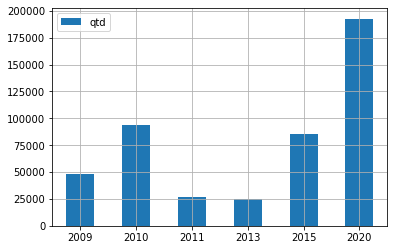

In [12]:
qtd_urnas = dfu["modelo_urna"].astype(str).value_counts().to_frame("qtd").sort_index()
prt.display(stats.freq(dfu["modelo_urna"].astype(str)))
qtd_urnas.plot.bar(rot=0, grid=True)
plt.show()

In [13]:
for col in [["SG_UF", "NM_MUNICIPIO"], 
            ["SG_UF", "NM_MUNICIPIO", "NR_ZONA"], 
            ["SG_UF", "NM_MUNICIPIO", "NR_ZONA", "NR_SECAO"], 
            ["SG_UF", "NM_MUNICIPIO", "NR_ZONA", "NR_SECAO", "NR_LOCAL_VOTACAO"],
            ["SG_UF", "NM_MUNICIPIO", "NR_ZONA", "NR_SECAO", "NR_LOCAL_VOTACAO", "NM_LOCAL_VOTACAO"]]:
    
    print(len(dfu[col].drop_duplicates()), "entidades no nível de",col[-1])

5709 entidades no nível de NM_MUNICIPIO
6241 entidades no nível de NR_ZONA
472027 entidades no nível de NR_SECAO
472027 entidades no nível de NR_LOCAL_VOTACAO
472027 entidades no nível de NM_LOCAL_VOTACAO


In [14]:
# SAO PAULO
# Jair Bolsonaro: 14.216.587 (55,24%) 
# Lula 11.519.882 (44,76%)

# PARAIBA
# Lula (PT): 66,62% dos votos válidos (1.601.953 votos)
# Jair Bolsonaro (PL): 33,38% dos votos válidos (802.502 votos)

# BRASIL
# Lula 60.345.999 votos (50,90% dos votos válidos)
# Jair Bolsonaro 58.206.354 votos (49,10% dos votos válidos).

votos_validos = dfu[["13", "22"]].sum().to_frame("votos")
votos_validos["%"] = votos_validos / votos_validos.sum()
prt.display(votos_validos)

,votos,%
13,60345999,0.509024
22,58206354,0.490976


# <font color='magenta'>Votação Por Modelo de Urna</font>

,13,22,13_percentual,22_percentual,Lula %,Bolsonaro %
modelo_urna,,,,,,
2011,3432852,2943287,0.538390,0.461610,0.538390,0.461610
2010,12070380,10379355,0.537662,0.462338,0.537662,0.462338
2015,10766404,10114104,0.515620,0.484380,0.515620,0.484380
2013,3001068,2857302,0.512270,0.487730,0.512270,0.487730
2009,5963745,5722585,0.510318,0.489682,0.510318,0.489682
2020,25111550,26189721,0.489492,0.510508,0.489492,0.510508


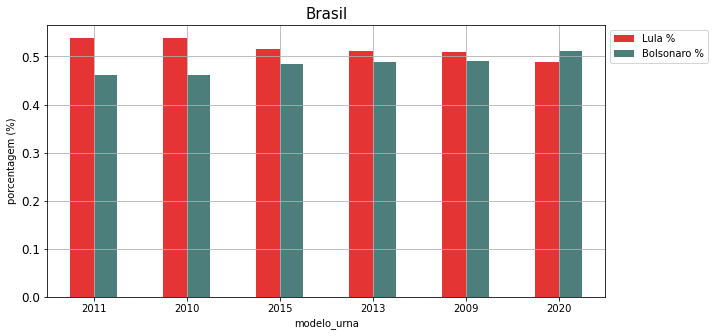

In [15]:
votos_por_modelo = dfu.groupby("modelo_urna")[["13", "22"]].sum()
votos_por_modelo["13_percentual"] = votos_por_modelo["13"] / votos_por_modelo.sum(axis=1)
votos_por_modelo["22_percentual"] = votos_por_modelo["22"] / votos_por_modelo.sum(axis=1)

votos_por_modelo = votos_por_modelo.sort_values("13_percentual", ascending=False)

votos_por_modelo["Lula %"] = votos_por_modelo["13_percentual"]
votos_por_modelo["Bolsonaro %"] = votos_por_modelo["22_percentual"]

prt.display(votos_por_modelo)

ax = votos_por_modelo[["Lula %", "Bolsonaro %"]].plot.bar(title=ESTADO, rot=0, grid=True, figsize=(10,5), 
                                                          alpha=0.8,
                                                          color=[CORES_CANDIDATOS["13"], 
                                                                 CORES_CANDIDATOS["22"]])

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set(ylabel='porcentagem (%)')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=10)
ax.title.set_size(15)
plt.show()
plt.show()

# <font color='magenta'>Votação Por Modelo de Urna e Endereço</font>

Endereço representa o local a ser considerado para comparação entre modelo de urnas.

In [16]:
COLS_ENDERECO = ["SG_UF", "NM_MUNICIPIO", "NR_ZONA", "NR_LOCAL_VOTACAO"]

In [17]:
votos_modelo_endereco = entidade_urna.votacao_por_endereco_modelo_urna_com_contagem_modelos(dfu, COLS_ENDERECO)

In [18]:
compara_modelos = votos_modelo_endereco[(votos_modelo_endereco["qtd_modelos"] > 1)]

In [19]:
compara_modelos_2020 = votos_modelo_endereco[(votos_modelo_endereco["qtd_modelos"] > 1) &
                                             ((~votos_modelo_endereco[('13_2020')].isna()) |
                                              (~votos_modelo_endereco[('22_2020')].isna()))]

if len(compara_modelos_2020) == 0:
    print()
    prt.printt(f"Não há modelos iguais para o mesmo local!", size=18, color="red")
    print(f"definição de local, considerando as variáveis: {COLS_ENDERECO}")
    
else:
    prt.printt(f"{len(compara_modelos_2020)} locais de votação tiveram o modelo 2020 e algum modelo anterior em suas seções.", size=18)
    print("Amostra")
    prt.display(compara_modelos_2020.sample(8))

Amostra


,SG_UF,NM_MUNICIPIO,NR_ZONA,NR_LOCAL_VOTACAO,13_2009,22_2009,13_2010,22_2010,13_2011,22_2011,13_2013,22_2013,13_2015,22_2015,13_2020,22_2020,qtd_modelos
85981,SP,PALMITAL,83,1031,NaN,NaN,NaN,NaN,652.0,1478.0,NaN,NaN,NaN,NaN,225.0,387.0,2
89372,SP,SAO PAULO,352,1309,NaN,NaN,144.0,98.0,NaN,NaN,NaN,NaN,1044.0,841.0,145.0,98.0,3
82968,SP,ESTRELA DO NORTE,261,1015,148.0,94.0,151.0,97.0,139.0,114.0,117.0,126.0,253.0,230.0,254.0,202.0,6
83941,SP,IRACEMAPOLIS,243,1040,74.0,138.0,262.0,500.0,115.0,155.0,101.0,169.0,123.0,152.0,257.0,517.0,6
83248,SP,GUARA,60,1023,NaN,NaN,301.0,467.0,95.0,148.0,NaN,NaN,110.0,124.0,1152.0,1360.0,4
86428,SP,PIRAPOZINHO,261,1104,NaN,NaN,155.0,347.0,92.0,162.0,NaN,NaN,85.0,177.0,230.0,531.0,4
91618,TO,ARAGUAINA,34,1147,NaN,NaN,60.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,104.0,2
91374,SP,VARZEA PAULISTA,242,1058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,988.0,803.0,156.0,103.0,2


In [20]:
if len(compara_modelos_2020) > 0:
    pro_lula_2009 = compara_modelos_2020.apply(lambda endereco : (endereco['13_2009']) / (endereco['13_2009'] + endereco['22_2009']), axis=1)
    pro_lula_2010 = compara_modelos_2020.apply(lambda endereco : (endereco['13_2010']) / (endereco['13_2010'] + endereco['22_2010']), axis=1)
    pro_lula_2011 = compara_modelos_2020.apply(lambda endereco : (endereco['13_2011']) / (endereco['13_2011'] + endereco['22_2011']), axis=1)
    pro_lula_2013 = compara_modelos_2020.apply(lambda endereco : (endereco['13_2013']) / (endereco['13_2013'] + endereco['22_2013']), axis=1)
    pro_lula_2015 = compara_modelos_2020.apply(lambda endereco : (endereco['13_2015']) / (endereco['13_2015'] + endereco['22_2015']), axis=1)
    pro_lula_2020 = compara_modelos_2020.apply(lambda endereco : (endereco['13_2020']) / (endereco['13_2020'] + endereco['22_2020']), axis=1)

,count,mean,std,min,25%,50%,75%,max
modelo_2009,73.0,0.395408,0.103531,0.197719,0.324176,0.379182,0.459504,0.696356
modelo_2010,95.0,0.421345,0.107285,0.216021,0.329619,0.409283,0.495902,0.673554
modelo_2011,54.0,0.419457,0.099727,0.216794,0.345363,0.402022,0.506262,0.632231
modelo_2013,26.0,0.403144,0.129337,0.193396,0.303380,0.359992,0.492572,0.694340
modelo_2015,99.0,0.404768,0.093343,0.254902,0.326169,0.382939,0.467011,0.670498
modelo_2020,163.0,0.407828,0.101448,0.207831,0.322843,0.394864,0.466447,0.658163


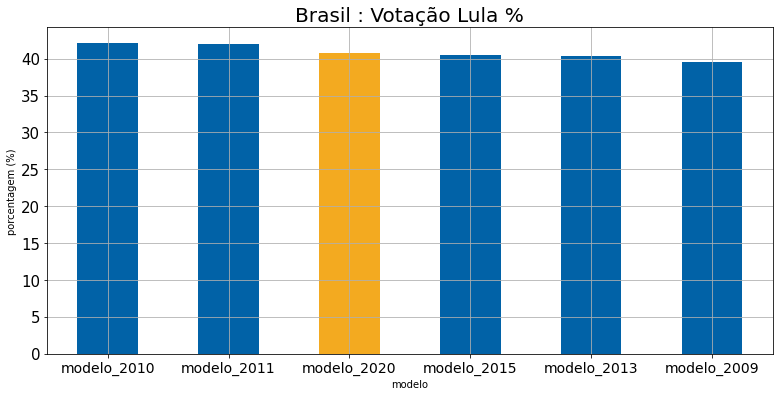

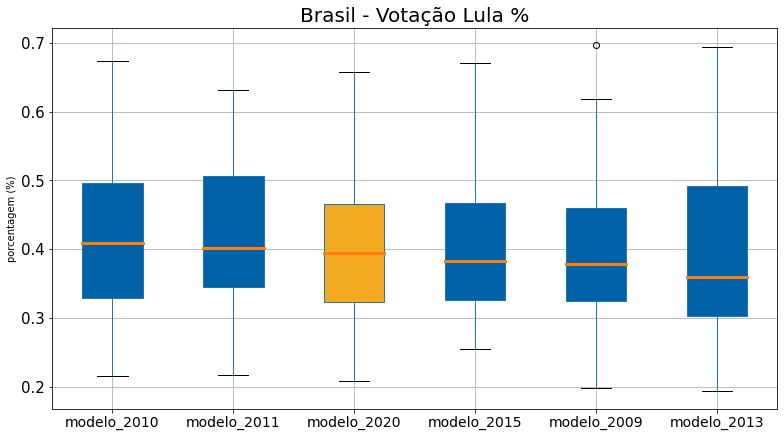

In [21]:
if len(compara_modelos_2020) > 0:
    
    pro_lula_describes = pro_lula_2009.describe().to_frame("modelo_2009").transpose() \
                            .append(pro_lula_2010.describe().to_frame("modelo_2010").transpose()) \
                            .append(pro_lula_2011.describe().to_frame("modelo_2011").transpose()) \
                            .append(pro_lula_2013.describe().to_frame("modelo_2013").transpose()) \
                            .append(pro_lula_2015.describe().to_frame("modelo_2015").transpose()) \
                            .append(pro_lula_2020.describe().to_frame("modelo_2020").transpose())

    prt.display(pro_lula_describes)
    
    COLOR_MODELO_URNA_BIN = {"modelo_2020": "#f3aa20", "modelo_2009": "#0162a7", 
                             "modelo_2010": "#0162a7", "modelo_2011": "#0162a7", 
                             "modelo_2013": "#0162a7", "modelo_2015": "#0162a7"}

    pro_lula_describes["cor_modelo_urna_bin"] = pro_lula_describes.index.to_series().replace(COLOR_MODELO_URNA_BIN)
    pro_lula_describes["media"] = pro_lula_describes["mean"] * 100
    
    pro_lula_describes = pro_lula_describes.sort_values(by="mean", ascending=False)
    pro_lula_describes["modelo"] = pro_lula_describes.index.to_series().str.replace("Lula_", "")
    pro_lula_describes = pro_lula_describes.set_index("modelo")

    fig, ax = plt.subplots()
    ax = pro_lula_describes["media"].plot.bar(title=f"{ESTADO} : Votação Lula %",
                                              figsize=(13,6), grid=True, rot=0,
                                              color=pro_lula_describes["cor_modelo_urna_bin"],
                                              ax=ax)

    # We change the fontsize of minor ticks label 
    ax.set(ylabel='porcentagem (%)')
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.title.set_size(20)
    plt.show()
    
    
    #BOXPLOT
    
    fig, ax = plt.subplots()
    ax = pro_lula_2009.to_frame("modelo_2009") \
            .join(pro_lula_2010.to_frame("modelo_2010")) \
            .join(pro_lula_2011.to_frame("modelo_2011")) \
            .join(pro_lula_2013.to_frame("modelo_2013")) \
            .join(pro_lula_2015.to_frame("modelo_2015")) \
            .join(pro_lula_2020.to_frame("modelo_2020")) \
            [pro_lula_describes.sort_values("50%", ascending=False).index] \
        .plot.box(title=f"{ESTADO} - Votação Lula %", grid=True, figsize=(13,7), 
                  patch_artist=True, ax=ax, layout=(5,1), medianprops=dict(linestyle='-', linewidth=3))
    
    ax.set(ylabel='porcentagem (%)')
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.title.set_size(20)
    
    for i in range(6):
        ax.findobj(matplotlib.patches.Patch)[i].set_facecolor("#0162a7")
    
    i_2020 = pro_lula_describes.index.to_list().index("modelo_2020")
    ax.findobj(matplotlib.patches.Patch)[i_2020].set_facecolor("#f3aa20")
    
    plt.show()